In [2]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import kv
import matplotlib.pyplot as plt

In [3]:
#Plot particle density as a function of m for T=.1565 GeV using quantum statistics
g=1 
mu=0  #assuming no chemical potential
mass=np.linspace(0.1,1,1000) # mass in GeV 
T=.1565
i=[]
for m in mass:
    def n(p):
        return (g*(4*np.pi)/((2*np.pi)**3))*(p**2)/(np.exp((np.sqrt(p**2+m**2) - mu)/T)-1)

    solution1, abserr  = quad(n,0,20.)
    
    i=np.append(i, solution1)

# Plot particle density using Boltzmann approximation
k=[]

for m in mass:
    def b(j):
        return (g/(2*np.pi**2)*(m**2)*T*np.exp(mu/T)*kv(2,m/T))
    k=np.append(k, b(m))
    
#Plot particle density using Boltzmann & large argument approximation
l=[]

for m in mass:
    def b(j):
        return (g/(2*np.pi**2)*(m**2)*T*np.exp(mu/T))*np.sqrt(np.pi*T/(2*m))*np.exp(-m/T)
    l=np.append(l, b(m))


Text(0,0.5,'Density')

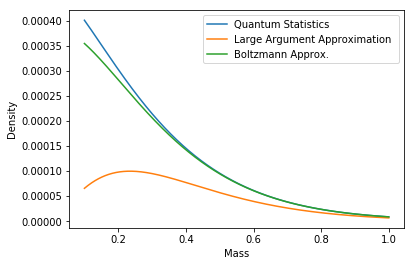

In [4]:
plt.plot(mass,i, label="Quantum Statistics")
plt.plot(mass,l, label="Large Argument Approximation ")
plt.plot(mass,k, label="Boltzmann Approx.")
plt.legend(loc="upper right")
plt.ylim()
plt.xlabel("Mass")
plt.ylabel("Density")

In [5]:
#masses in GeV/c^2
md = 1.8756
m3He = 2.8084
m4He = 3.7274

#Abundance of species (given on Page 8 of lecture) for fixed T
T=.1565 #GeV 
mu=0


def n(p,m,g,s):
    return (g*(4*np.pi)/((2*np.pi)**3))*(p**2)/(np.exp((np.sqrt(p**2+m**2) - mu)/T)-s*1)

n_md,err=quad(n,0,np.inf,args=(md,3,1))
n_m3He, err=quad(n,0,np.inf,args=(m3He,2,-1))
n_m4He, err=quad(n,0,np.inf,args=(m4He,1,1)) 

raw=[n_md,n_m3He,n_m4He]
normed = [i/sum(raw) for i in raw]
   

# Estimate of abundances from graph on page 25 
a_d=6*10**-1
a_3He=8*10**-3
a_4He=4*10**-6
estimate=[a_d, a_3He, a_4He]
normed_e = [i/sum(estimate) for i in estimate]


print('Abundance Calculated from Statistical Model: ', normed)
print('Abundance of Nuclei from ALICE             : ', normed_e)
print(n_m3He/n_md, ':' ,a_3He/a_d, n_m4He/n_md,  ':', a_4He/a_d,)

Abundance Calculated from Statistical Model:  [0.9970017500294499, 0.0029919632572737082, 6.2867132764680795e-06]
Abundance of Nuclei from ALICE             :  [0.9868356129235992, 0.013157808172314654, 6.578904086157327e-06]
0.003000960888168281 : 0.013333333333333332 6.305619098745192e-06 : 6.666666666666666e-06


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':
